# Importing Required Library

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

# Importing Dataset

In [34]:
student_mat=pd.read_csv("student-mat.csv")

In [35]:
student_mat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [36]:
student_mat.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


# Visualtization the dataset

the number of null value in each column = 
  school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64


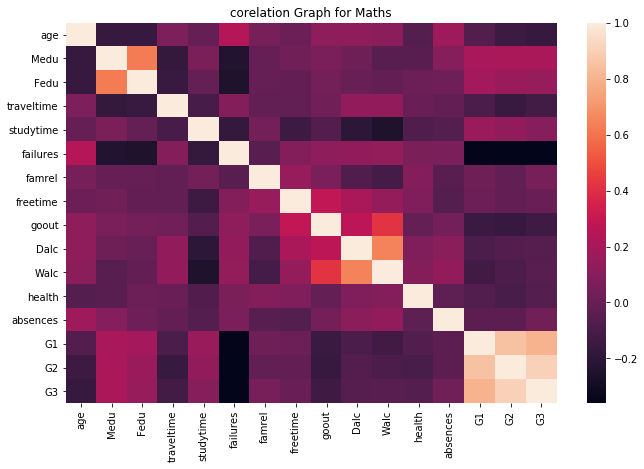

In [42]:
def feature_visualization(student_mat):
    
    #checking the null value
    print("the number of null value in each column = \n ", np.sum(student_mat.isnull()))
    
    #ploting the corelation graph
    fig=plt.figure(figsize=(11,7))
    ax=fig.add_subplot(1,1,1)
    ax.set_title("corelation Graph for Maths")
    sbn.heatmap(student_mat.corr(),ax=ax)
    (student_mat.describe())

feature_visualization(student_mat)

# Building Features

In [44]:
temp = student_mat.drop(labels=['Mjob','Fjob','reason','guardian'],axis=1)
temp=pd.get_dummies(temp,drop_first=True)

In [45]:
Mjob=pd.get_dummies(student_mat['Mjob'],prefix='Mjob')
Fjob=pd.get_dummies(student_mat['Fjob'],prefix='Fjob')
reason=pd.get_dummies(student_mat['reason'],prefix='reason')
guardian=pd.get_dummies(student_mat['guardian'],prefix='guardian')

In [49]:
student_mat=pd.concat([temp,Mjob,Fjob,reason,guardian],axis=1)

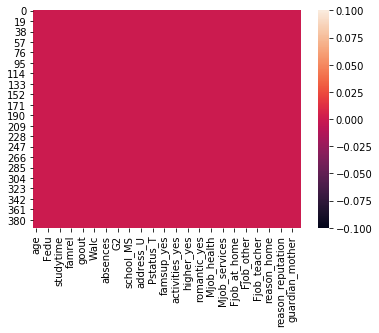

In [51]:
sbn.heatmap(student_mat.isna())

# Spliting Trainning and Test Set

In [54]:
X_mat=student_mat.drop(labels='G3',axis=1)
y_mat=student_mat['G3']

In [65]:
X_mat_train,X_mat_test,y_mat_train,y_mat_test=train_test_split(X_mat,y_mat,test_size=.3)

# Model Slection and Evaluation

# Linear Regression

R2_score for Logistic Regression =  0.8168648531993865
Mean Squared error for Logistic Regression =  3.8732676178996783


Text(0.5, 1.0, 'RMSE - Logisitic Regression on test data')

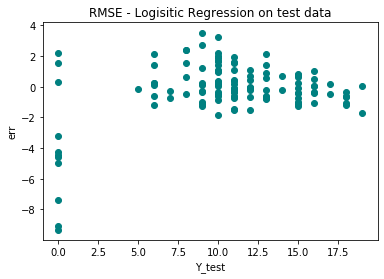

In [66]:
linRegres = LinearRegression()
linRegres.fit(X_mat_train,y_mat_train)
pred_LR = linRegres.predict(X_mat_test)
print('R2_score for Logistic Regression = ',r2_score(y_pred=pred_LR,y_true=y_mat_test))
print('Mean Squared error for Logistic Regression = ',mean_squared_error(y_pred=pred_LR,y_true=y_mat_test))
plt.scatter(y_mat_test,(y_mat_test-pred_LR),color='teal')
plt.xlabel('Y_test')
plt.ylabel('err')
plt.title('RMSE - Logisitic Regression on test data')

# Decision Tree Regressor

R2_score for Logistic Regression =  0.7667772081507425
Mean Squared error for Logistic Regression =  5.840336134453781


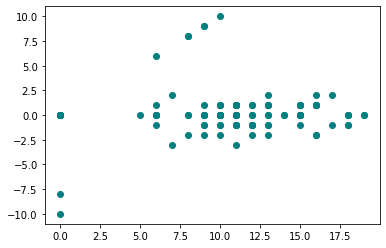

In [67]:
DescReg = DecisionTreeRegressor(max_features='auto')
DescReg.fit(X_mat_train,y_mat_train)
pred_dr = DescReg.predict(X_mat_test)
RMSE_dr = mean_squared_error(y_true=y_mat_test,y_pred=pred_dr)
r2_dr = r2_score(pred_dr,y_mat_test)
print('R2_score for Logistic Regression = ',r2_dr)
print('Mean Squared error for Logistic Regression = ',RMSE_dr)
plt.scatter(y_mat_test,(y_mat_test-pred_dr),color='teal')

# KNeighbor Regressor

R2_score for Logistic Regression =  0.7444186026533259
Mean Squared error for Logistic Regression =  4.136160714285714


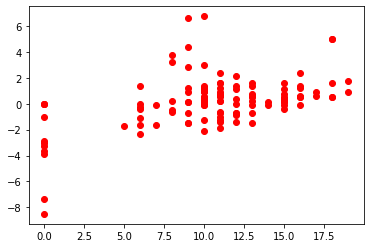

In [68]:
knr = KNeighborsRegressor(n_neighbors=8)
knr.fit(X_mat_train,y_mat_train)
pred_kr = knr.predict(X_mat_test)
RMSE_knr = mean_squared_error(y_mat_test,pred_kr)
r2_knr = r2_score(pred_kr,y_mat_test)
print('R2_score for Logistic Regression = ',r2_knr)
print('Mean Squared error for Logistic Regression = ',RMSE_knr)
plt.scatter(y_mat_test,(y_mat_test-pred_kr),color='red')

# Support Vector Machine

R2_score for Logistic Regression =  0.7821034744670683
Mean Squared error for Logistic Regression =  4.608463045700452


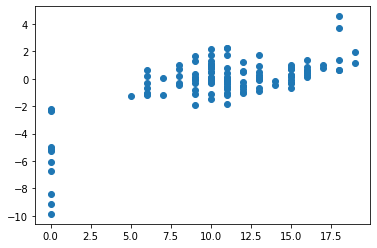

In [69]:
svr = SVR()
svr.fit(X_mat_train,y_mat_train)
pred = svr.predict(X_mat_test)
r2_svr = r2_score(y_mat_test,pred)
RMSE_svr = mean_squared_error(y_true = y_mat_test,y_pred = pred)
print('R2_score for Logistic Regression = ',r2_svr)
print('Mean Squared error for Logistic Regression = ',RMSE_svr)
plt.scatter(y_mat_test,(y_mat_test-pred))

# Random Forest Regressor

In [70]:
rfr = RandomForestRegressor(n_estimators=30)
rfr.fit(X_mat_train,y_mat_train)
pred_rfr = rfr.predict(X_mat_test)
r2_rfr = r2_score(pred_rfr,y_mat_test)
RMSE_rfr = mean_squared_error(pred_rfr,y_mat_test)
print('R2_score for Logistic Regression = ',r2_rfr)
print('Mean Squared error for Logistic Regression = ',RMSE_rfr)

R2_score for Logistic Regression =  0.8591752458505353
Mean Squared error for Logistic Regression =  2.8697105508870213


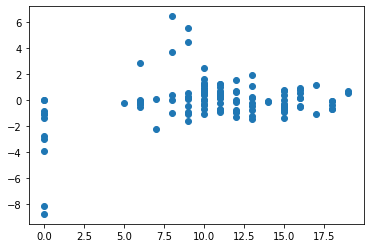

In [73]:
plt.scatter(y_mat_test,(y_mat_test-pred_rfr))

# Reiterate and Optimize the best Model

In [74]:
df = pd.DataFrame(sorted(zip(rfr.feature_importances_,X_mat_train.columns)),columns = ['Values','Feature'])
df = df.sort_values(by='Values',ascending=False)[:35]
cols = df.Feature.values
rfr = RandomForestRegressor(n_estimators=30)
rfr.fit(X_mat_train[cols],y_mat_train)
pred_rfr = rfr.predict(X_mat_test[cols])
r2_score(pred_rfr,y_mat_test)

0.8506004128895439

# Hyper Parameter Tuning

In [75]:
param_grid = {'n_estimators' : [i for i in range(2,50)],'min_samples_leaf':[i for i in range(2,10)]}
grs = GridSearchCV(estimator = RandomForestRegressor(), param_grid = param_grid,scoring='r2')
grs.fit(X_mat,y_mat)

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'min_samples_leaf': [2, 3, 4, 5, 6, 7, 8, 9],
                         'n_estimators': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                          13, 14, 15, 16, 17, 18, 19, 20, 21,
                                          22, 23, 24, 25, 26, 27, 28, 29, 30,
                                          31, ...]},
             scoring='r2')

In [76]:
grs.cv_results_['rank_test_score'][214]
grs.cv_results_['params'][214]

{'min_samples_leaf': 6, 'n_estimators': 24}

In [77]:
grs.best_estimator_

RandomForestRegressor(min_samples_leaf=6, n_estimators=8)

# Retraining and predicting on unknown data

In [79]:
rfr2=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                           max_features='auto', max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=6, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=24, n_jobs=1,
                           oob_score=False, random_state=None, verbose=0, warm_start=False)
rfr2.fit(X_mat_train,y_mat_train)

RandomForestRegressor(min_samples_leaf=6, n_estimators=24, n_jobs=1)

In [81]:
pred_rfr2 = rfr2.predict(X_mat_test)
r2_rfr2 = r2_score(y_true=y_mat_test,y_pred=pred_rfr2)
r2_score(y_true=y_mat_test,y_pred=pred_rfr2)
df = pd.DataFrame(sorted(zip(rfr2.feature_importances_,X_mat_train.columns)),columns =
['Values','Feature']).sort_values(by='Values',ascending=False)[:35]
cols = df.Feature.values
rfr2=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                           max_features='auto', max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=9, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=27, n_jobs=1,
                           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [85]:
rfr2.fit(X_mat_train[cols],y_mat_train)
pred_rfr2 = rfr2.predict(X_mat_test[cols])
r2_rfr2 = r2_score(y_mat_test,pred_rfr2)
RMSE_rfr2 = mean_squared_error(y_true = y_mat_test,y_pred = pred_rfr2)
print('R2_score for Logistic Regression = ',r2_rfr2)
print('Mean Squared error for Logistic Regression = ',RMSE_rfr2)

R2_score for Logistic Regression =  0.8778010119925961
Mean Squared error for Logistic Regression =  2.584481414179329


# For Portuguese Dataset

In [87]:
student_por=pd.read_csv("student-por.csv")

In [88]:
student_por.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,16.744222,2.514638,2.306626,1.568567,1.930663,0.221880,3.930663,3.180277,3.184900,1.502311,2.280431,3.536210,3.659476,11.399076,11.570108,11.906009
std,1.218138,1.134552,1.099931,0.748660,0.829510,0.593235,0.955717,1.051093,1.175766,0.924834,1.284380,1.446259,4.640759,2.745265,2.913639,3.230656
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,10.000000,10.000000,10.000000
50%,17.000000,2.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,12.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,32.000000,19.000000,19.000000,19.000000


In [89]:
student_por.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649 non-null    object
 20  higher    

The number of null value in portuguese dataset =  school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64


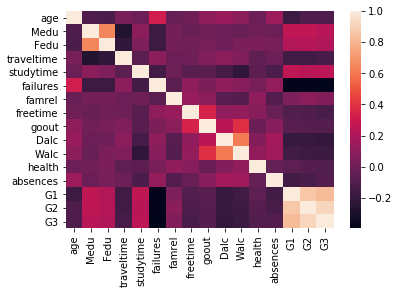

In [90]:
def feature_visualization(data_por):
    print('The number of null value in portuguese dataset = ',np.sum(data_por.isnull()))
    sbn.heatmap(data_por.corr())
feature_visualization(student_por)

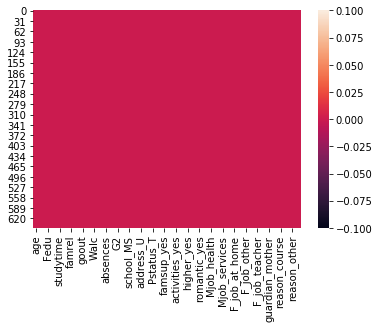

In [91]:
temp2 = student_por.drop(labels=['Mjob','Fjob','reason','guardian'],axis=1)
temp2 = pd.get_dummies(temp2,drop_first=True)
Mjob = pd.get_dummies(student_por['Mjob'],prefix='Mjob')
F_job = pd.get_dummies(student_por['Fjob'],prefix='F_job')
reason = pd.get_dummies(student_por['reason'],prefix='reason')
guardian =pd.get_dummies(student_por['guardian'],prefix='guardian')
student_por = pd.concat([temp2,Mjob,F_job,guardian,reason],axis=1)
sbn.heatmap(student_por.isna())

# Train Test Split

In [92]:
X_por = student_por.drop(labels='G3',axis=1)
y_por = student_por['G3']
X_por_train,X_por_test,y_por_train,y_por_test = train_test_split(X_por,y_por,test_size=.3)

# Linear Regression

In [93]:
linRegres = LinearRegression()
linRegres.fit(X_por_train,y_por_train)
pred_LR = linRegres.predict(X_por_test)
RMSE_LR = mean_squared_error(y_por_test,pred_LR)
r2_LR = r2_score(y_pred=pred_LR,y_true=y_por_test)
print('R2_score for Logistic Regression = ',r2_LR)
print('Mean Squared error for Logistic Regression = ',RMSE_LR)

R2_score for Logistic Regression =  0.8566102286608134
Mean Squared error for Logistic Regression =  1.4764866437667454


Text(0.5, 1.0, 'RMSE - Logisitic Regression')

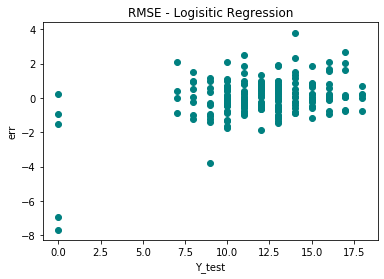

In [94]:
plt.scatter(y_por_test,(y_por_test-pred_LR),color='teal')
plt.xlabel('Y_test')
plt.ylabel('err')
plt.title('RMSE - Logisitic Regression')

# Support Vector Machine

In [95]:
svr = SVR()
svr.fit(X_por_train,y_por_train)
pred_svr = svr.predict(X_por_test)
RMSE_svr = mean_squared_error(y_por_test,pred_LR)
r2_svr = r2_score(y_pred=pred_svr,y_true=y_por_test)
print('R2_score for Logistic Regression = ',r2_svr)
print('Mean Squared error for Logistic Regression = ',RMSE_svr)

R2_score for Logistic Regression =  0.8137391132069919
Mean Squared error for Logistic Regression =  1.4764866437667454


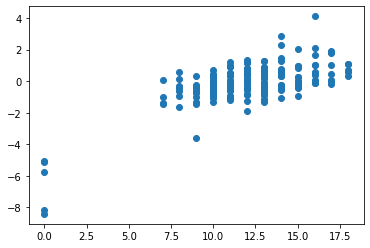

In [96]:
plt.scatter(y_por_test,(y_por_test-pred_svr))

# Random Forest

In [97]:
rfr = RandomForestRegressor(n_estimators=30)
rfr.fit(X_por_train,y_por_train)
pred_rfr = rfr.predict(X_por_test)
RMSE_rfr = mean_squared_error(y_por_test,pred_rfr)
r2_rfr = r2_score(y_pred=pred_rfr,y_true=y_por_test)
print('R2_score for Logistic Regression = ',r2_rfr)
print('Mean Squared error for Logistic Regression = ',RMSE_rfr)

R2_score for Logistic Regression =  0.8627887712917748
Mean Squared error for Logistic Regression =  1.412866096866097


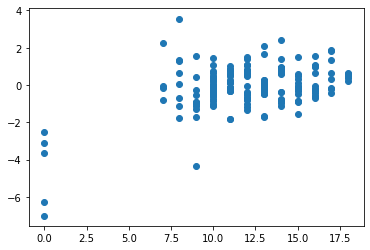

In [98]:
plt.scatter(y_por_test,(y_por_test-pred_rfr))

# Hpyer Parameter Tuning

In [99]:
rfr = RandomForestRegressor(n_estimators=30)
rfr.fit(X_por_train,y_por_train)
pred_rfr = rfr.predict(X_por_test)
RMSE_rfr = mean_squared_error(y_por_test,pred_rfr)
r2_rfr = r2_score(y_pred=pred_rfr,y_true=y_por_test)
print('R2_score for Logistic Regression = ',r2_rfr)
print('Mean Squared error for Logistic Regression = ',RMSE_rfr)

R2_score for Logistic Regression =  0.8567216796409429
Mean Squared error for Logistic Regression =  1.4753390313390313


In [100]:
param_grid = {'n_estimators' : [i for i in range(2,50)],'min_samples_leaf':[i for i in range(2,10)]}
grs = GridSearchCV(estimator = RandomForestRegressor(), param_grid = param_grid,scoring='r2')
grs.fit(X_por,y_por)

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'min_samples_leaf': [2, 3, 4, 5, 6, 7, 8, 9],
                         'n_estimators': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                          13, 14, 15, 16, 17, 18, 19, 20, 21,
                                          22, 23, 24, 25, 26, 27, 28, 29, 30,
                                          31, ...]},
             scoring='r2')

In [101]:
grs.cv_results_['params'][69]
grs.cv_results_['rank_test_score'][69]

270

In [102]:
grs.best_estimator_

RandomForestRegressor(min_samples_leaf=4, n_estimators=11)

# Retraining and Predicting Unknown Data

In [103]:
rfr3 =RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                            max_features='auto', max_leaf_nodes=None,
                            min_impurity_decrease=0.0, min_impurity_split=None,
                            min_samples_leaf=3, min_samples_split=2,
                            min_weight_fraction_leaf=0.0, n_estimators=23, n_jobs=1,
                            oob_score=False, random_state=None, verbose=0, warm_start=False)

In [104]:
rfr3.fit(X_por_train,y_por_train)

RandomForestRegressor(min_samples_leaf=3, n_estimators=23, n_jobs=1)

In [105]:
pred_rfr3 = rfr3.predict(X_por_test)

In [106]:
r2_score(pred_rfr3,y_por_test)
mean_squared_error(pred_rfr3,y_por_test)

1.4061486239277583